# 05_топ_1
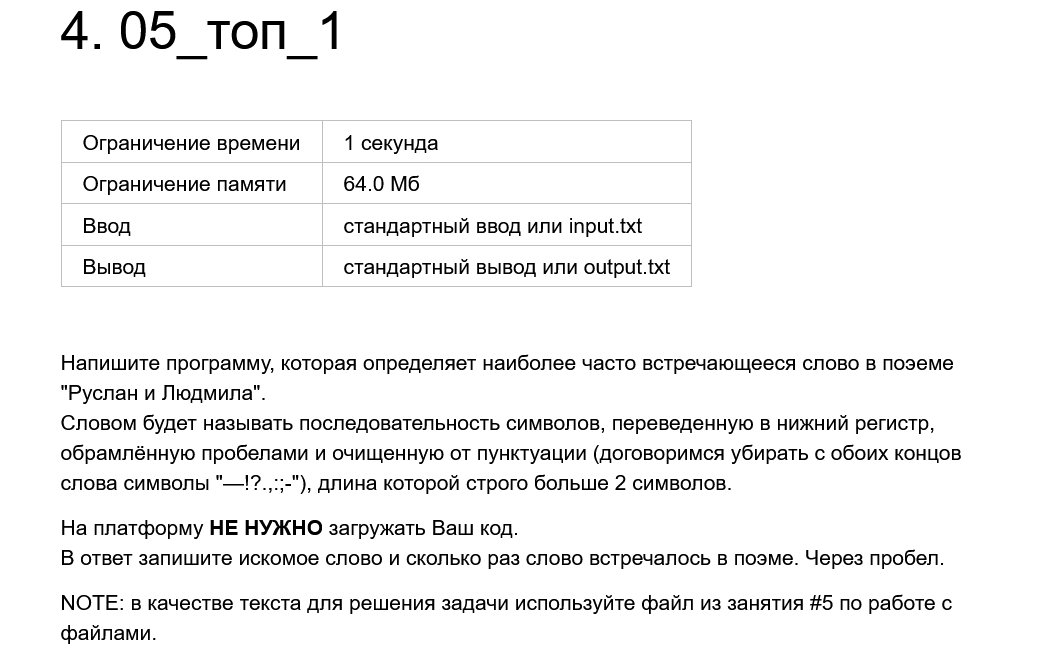

In [12]:
multiply_by_2 = lambda number: number * 2
multiply_by_2(10)

20

In [14]:
def multiply_by_2(number):
    return number * 2
multiply_by_2(10)

20

In [27]:
def get_first(pair):
    return pair[1]

with open("C://Users/igumn/JOB/HOCK/HOCK4/HOCK_SEPTEMBER_2023/04_strings_IO/data/ruslan_i_lyudmila.txt", 'r', encoding='utf8') as poem:
    words_dict = {}
    
    for line in poem:
        for word in line.strip().split():
            word = word.strip("—!?.,:;-").lower()
            if len(word) < 3:
                continue
            if words_dict.get(word, 'ERROR') == 'ERROR':
                words_dict[word] = 1
            else:
                words_dict[word] += 1

# max_count = max(words_dict.values())
# for k, v in words_dict.items():
#     if v == max_count:
#         print(k, v)
        
# print(sorted(
#     words_dict.items(), 
#     reverse=True, 
#     key=lambda x: x[1]))

print(sorted(
    words_dict.items(), 
    reverse=True, 
    key=get_first)[0])

('руслан', 57)


### 1. ИПЦ
Индекс потребительских цен определяется по формуле
$$ \text{ИПЦ} = \text{СТТГ} \div \text{СТБГ} $$
, где СТТГ, СТБГ -- стоимость потребительской корзины в текущей и базовом годах соответственно.

Напишите функцию *CPI* для подсчета индекса потребительной цены.
Функция принимает два числа: СТТГ и СТБГ, возвращает число с плавающей точкой, округленное до 2 знаков после запятой.

In [37]:
# ваш код
def CPI(cttg:int, ctbg:int):
    """
    Функция для подсчета индекса потребительских цен.
    """
    return round(cttg / ctbg, 2)

In [30]:
CPI(1100, 1000)

1.1

### 2. ТИ
Темп инфляции определяется формулой
$$ \text{ТИ} = \frac{\text{ИПЦ}_1 - \text{ИПЦ}_0}{\text{ИПЦ}_0} * 100\% $$

Напишите функцию *IR* для подсчета темпа инфляции, которая принимает два действительных числа -- значения индексов потребительских цен.

Функция возвращает число процентов с округлением до 2 знака после запятой *p*,  $ 0 \leq p \leq 100$.

In [31]:
# ваш
def IR(ipc1, ipc0):
    return round((ipc1 - ipc0) / ipc0 * 100, 2)

In [35]:
IR(8, 5)

60.0

### 3. Тип инфляции
В соответствии с темпом инфляции можно разделить её на несколько типов:
1. Ползучая инфляция с ростом цен до 5 % годовых,
2. Умеренная инфляция до 10 % годовых,
3. Галопирующая инфляция с ростом цен 20-200% годовых,
4. Гиперинфляция с катастрофическим ростом цен более 200 % в год.

Напишите функцию *IR_type*, которая принимает темп инфляции (действительное число) и возвращает её тип (целое число).

In [36]:
def IR_type(tempo):
    if tempo < 0:
        return 0
    elif tempo < 5:
        return 1
    elif tempo < 10:
        return 2
    elif tempo < 200:
        return 3
    else:
        return 4
    

### 4. main
Напишите функцию *main*, которая принимает принимает СТТГ1, СТБГ1,  СТТГ0, СТБГ0 и **печатает** информационное сообщение о темпах инфляции.

Указания:  
Внутри функции main воспользуйтесь написанными ранее функциями.

In [52]:
def main(cttg1, ctbg1, cttg0, ctbg0):
    ipc1 = CPI(cttg1, ctbg1)
    ipc0 = CPI(cttg0, ctbg0)
    rate = IR(ipc1, ipc0)
    type_inf = IR_type(rate)
    
    if type_inf == 1:
        return 'Ползучая'
    elif type_inf == 2:
        return 'Умеренная'
    elif type_inf == 3:
        return 'Галопирующая'
    elif type_inf == 4:
        return 'Гипер'
    else:
        return 'Что-то не то'
    

In [ ]:
def main2(cttg1, ctbg1, cttg0, ctbg0):
    type_inf = IR_type(IR(CPI(cttg1, ctbg1), CPI(cttg0, ctbg0)))
    
    if type_inf == 1:
        return 'Ползучая'
    elif type_inf == 2:
        return 'Умеренная'
    elif type_inf == 3:
        return 'Галопирующая'
    elif type_inf == 4:
        return 'Гипер'
    else:
        return 'Что-то не то'
    

In [51]:
main(1200, 1100, 1100, 800)

'Что-то не то'

### 5. Уникальные авторы
В файле *hw6_books.xml* в формате [xml](https://support.microsoft.com/ru-ru/office/xml-%D0%B4%D0%BB%D1%8F-%D0%BD%D0%B0%D1%87%D0%B8%D0%BD%D0%B0%D1%8E%D1%89%D0%B8%D1%85-a87d234d-4c2e-4409-9cbc-45e4eb857d44).

Напишите функцию *get_authors*, которая в качестве аргумента принимает название xml файла и возвращает список с уникальными именами всех авторов в xml файле.

То есть необходимо определить содержимое полей *author*, сохранить каждое в список и вернуть результат.

In [59]:
with open("./data/hw6_books.xml", 'r', encoding='utf8') as xml:
    authors = []
    for line in xml:
        if '<author>' in line:
            start = line.find('>') + 1
            end = line.rfind('<')
            authors.append(line[start:end])
authors

['Gambardella, Matthew',
 'Ralls, Kim',
 'Corets, Eva',
 'Corets, Eva',
 'Corets, Eva',
 'Randall, Cynthia',
 'Thurman, Paula',
 'Knorr, Stefan',
 'Kress, Peter',
 "O'Brien, Tim",
 "O'Brien, Tim",
 'Galos, Mike']

In [63]:
list(set(authors))

['Thurman, Paula',
 'Knorr, Stefan',
 "O'Brien, Tim",
 'Corets, Eva',
 'Randall, Cynthia',
 'Galos, Mike',
 'Gambardella, Matthew',
 'Kress, Peter',
 'Ralls, Kim']

In [62]:
unique_authors = []
for a in authors:
    if a not in unique_authors:
        unique_authors.append(a)
unique_authors

['Gambardella, Matthew',
 'Ralls, Kim',
 'Corets, Eva',
 'Randall, Cynthia',
 'Thurman, Paula',
 'Knorr, Stefan',
 'Kress, Peter',
 "O'Brien, Tim",
 'Galos, Mike']

In [64]:
def get_authors(path):
    with open(path, 'r', encoding='utf8') as xml:
        authors = []
        for line in xml:
            if '<author>' in line:
                start = line.find('>') + 1
                end = line.rfind('<')
                authors.append(line[start:end])
    return sorted(set(authors))

In [67]:
get_authors('./data/hw6_books.xml')

['Corets, Eva',
 'Galos, Mike',
 'Gambardella, Matthew',
 'Knorr, Stefan',
 'Kress, Peter',
 "O'Brien, Tim",
 'Ralls, Kim',
 'Randall, Cynthia',
 'Thurman, Paula']

### 6. Фильтрация
Дан файл *DataYearGeo760.csv*. Напишите функцию *filter*, которая принимает в качестве аргумента название столбца и значение. Необходимо в новый файл формата csv (разделитель -- запятая) сохранить все строки из исходного файла, где значение в указанном столбце равно введенному значению.

Конечный файл назвать *filter_col_val.csv*, где col -- название столбца, а val -- значение для фильтрации.

Пример:
если функции дать название столбца Area, а значение XXX, то в результате нужно создать файл с названием *filter_Area_XXX.csv*, в который будут записаны все строки, в которых в столбце Area было значение XXX.

In [72]:
col_name = 'Area'
value = 'A100100'

In [75]:
columns = "anzsic06,Area,year,geo_count,ec_count"
col_index = columns.split(',').index(col_name) + 1

In [76]:
with open("./data/DataYearGeo760.csv", 'r', encoding='utf8') as inpf:
    with open(f"filter_{col_name}_{value}.csv", 'w', encoding='utf8') as outf:
        outf.write(inpf.readline()) # читаем заголовок и сразу же пишем его в новый файл
        for line in inpf:
            line_split = line.strip().split(',')
            if line_split[col_index] == value:
                outf.write(line)

In [82]:
def filter(col_name, value):
    value = str(value)
    columns = "anzsic06,Area,year,geo_count,ec_count"
    col_index = columns.split(',').index(col_name) + 1
    
    with open("./data/DataYearGeo760.csv", 'r', encoding='utf8') as inpf:
        with open(f"filter_{col_name}_{value}.csv", 'w', encoding='utf8') as outf:
            outf.write(inpf.readline()) # читаем заголовок и сразу же пишем его в новый файл
            for line in inpf:
                line_split = line.strip().split(',')
                if line_split[col_index] == value:
                    outf.write(line)

In [84]:
filter('year', 2021)